# Machine Learning

First of all, lets load Matplotlib and NumPy

In [4]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Artificial neural networks

For historical reasons lets start with the simplest form of a neuron, the _Perceptron_. It will give us and idea of the basic elements of an artificial neuron.

In [11]:
class Perceptron:
    def __init__(self, w, x, threshold):
        self.w = w
        self.x = x
        self.threshold = threshold

    def run(self):
        sum_ = 0
        for j in xrange(0, len(self.w)):
            sum_ += self.w[j] * self.x[j]
        if sum_ <= self.threshold:
            return 0
        else:
            return 1

We can run it:

In [12]:
neuron = Perceptron([6.0, 2.0, 2.0], [0, 1, 0], 0.5)
print neuron.run()

1


A Sigmoid neuron is a type of neuron that uses a sigmoid function as 
an activation function.

In [6]:
def sigmoid(z):
    return 1. / (1 + np.exp(-z))

Remember that Perceptron uses a step function

In [8]:
def step(z):
    if z <= 0:
        return 0.
    else:
        return 1.

If we compare both functions, we can see sigmoid is much smoother than step

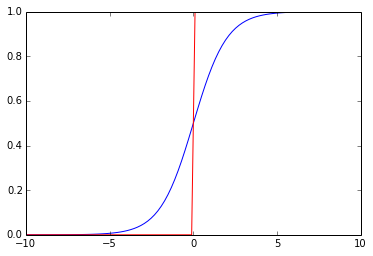

In [9]:
n = 100
xs = np.linspace(-10, 10, n)

plt.plot(xs, sigmoid(xs), 'b-')
plt.plot(xs, [step(x) for x in xs], 'r-')
plt.show()

Using different activation functions $f(w . x + b)$ will make changes on
the partial derivatives (that we use to change values of $w$ and $b$, smoothly).
Because sigmoid function has a exponential, and exponentials have sweet
properties while derivated, we're going to use them a lot as activation
functions.

Given that, let's create a Sigmoid neuron

In [2]:
class Sigmoid:
    def __init__(self, w, x, bias):
        self.w = np.array(w)
        self.x = np.array(x)
        self.bias = bias

    def sigma(self, z):
        sum_ = 0
        for j in xrange(self.w.size):
            sum_ += self.w[j] * self.x[j] - self.bias
        return 1.0 / (1.0 + np.exp(-sum_))

    def run(self):
        return self.sigma(self.w.dot(self.x) + self.bias)

Lets test it

In [10]:
sigmoid = Sigmoid([0.5, 0.5], [0, 1], 3.0)
print sigmoid.run()

0.0040701377159


See that we have a continuous value than a stiff 0 or 1, that opens room to learning (making small changes on values to tweak weights will give us sigma values with smooth changes).